## 서울시 생활정보 기반 대중교통 수요 분석


---

In [111]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

[기본 데이터]
* seoul_moving_month_202401.csv

[데이터 소개]
* 서울 시 구별 이동 2024년 1월 데이터
* https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_202401.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 'seoul_moving_month_202401.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [2]:
import pandas as pd
seoul_moving = pd.read_csv('1.2 seoul_moving_month_202401.csv',sep=",", encoding = 'UTF-8')

In [3]:
# 데이터 프레임의 Shape을 확인
seoul_moving.shape

(29361031, 10)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### 기본 정보 확인
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [4]:
# describe()
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,29361031.0,2.936103e+07,2.936103e+07,2.936103e+07,2.936103e+07,2.936103e+07
mean,202401.0,1.362194e+01,1.710538e+04,1.718123e+04,4.285979e+01,9.366626e+01
std,0.0,5.835017e+00,9.024981e+03,9.037102e+03,1.799456e+01,7.803316e+01
min,202401.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+00
25%,202401.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,4.900000e+01
50%,202401.0,1.400000e+01,1.120000e+04,1.120000e+04,4.000000e+01,7.400000e+01
75%,202401.0,1.800000e+01,3.101400e+04,3.101400e+04,5.500000e+01,1.120000e+02
max,202401.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,4.462000e+03


In [5]:
seoul_moving.describe(include='object')

,요일,성별,이동유형,이동인구(합)
count,29361031,29361031,29361031,29361031
unique,7,2,9,140404
top,월,M,EH,*
freq,4448237,16433525,5947038,3870174


In [6]:
# info()
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361031 entries, 0 to 29361030
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.2+ GB


In [7]:
# head()
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90


* 1번 열의 의미
    * " 2024년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 E(기타)로 이동한 10 ~ 15세 여성은 총 11.96명이며 이들의 평균 이동시간은 167분이다


#### 결측치 처리 ( NaN이 아닌 결측치를 처리)

* '이동인구(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)
    - 3명 미만의 이동인구는 * 처리 되어 있어서 해당 값을 나름의 기준으로 변경하세요.(중위값)
    - '이동인구(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [8]:
# value_counts()
seoul_moving['이동인구(합)'].value_counts()

이동인구(합)
*          3870174
6.05        420734
3.30        397265
3.29        286071
3.31        234821
            ...   
947.02           1
708.07           1
727.54           1
732.54           1
2581.46          1
Name: count, Length: 140404, dtype: int64

In [9]:
# '*' 값의 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체 (1.5명)
seoul_moving['이동인구(합)'] =  seoul_moving['이동인구(합)'].map(lambda x: 1.5 if x == '*' else x)

In [10]:
# 이동인구(합) column의 데이터 타입 변경
# astype()
seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].astype(float)

#### 이동유형, 요일, 성별 변수의 value수를 파악

In [11]:
# 이동유형, value_counts()
seoul_moving['이동유형'].value_counts()

이동유형
EH    5947038
HE    5585412
EE    5224553
WH    3078348
WE    2759477
HW    2700535
EW    2330931
WW    1082641
HH     652096
Name: count, dtype: int64

In [12]:
# 요일, value_counts()
seoul_moving['요일'].value_counts()

요일
월    4448237
수    4341429
화    4300070
토    4254525
금    4251430
목    4005959
일    3759381
Name: count, dtype: int64

* 24년 1월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 5, 화 : 5, 수 : 5, 목 : 4, 금 : 4, 토 : 4

In [13]:
# 성별, value_counts()
seoul_moving['성별'].value_counts()

성별
M    16433525
F    12927506
Name: count, dtype: int64

In [14]:
seoul_moving = seoul_moving.loc[(seoul_moving['출발 시군구 코드']<20000)&(seoul_moving['도착 시군구 코드']<20000)]
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90
...,...,...,...,...,...,...,...,...,...,...
29320192,202401,토,23,11250,11250,M,80,EH,18,28.41
29320193,202401,토,23,11250,11250,M,80,HE,78,9.46
29320194,202401,토,23,11250,11250,M,80,HW,168,9.48
29320195,202401,토,23,11250,11250,M,80,WH,16,47.27


In [15]:

df_eq=seoul_moving.loc[seoul_moving['출발 시군구 코드']==seoul_moving['도착 시군구 코드']]
# df_eq.groupby('출발 시군구 코드')[['평균 이동 시간(분)']].max().sort_values('평균 이동 시간(분)') #11190 영등포구
df_eq = df_eq.groupby('출발 시군구 코드',as_index=False)[['이동인구(합)']].sum()
df_eq

,출발 시군구 코드,이동인구(합)
0,11010,7214591.37
1,11020,7614020.16
2,11030,6634596.40
3,11040,8079923.65
4,11050,9902446.34
5,11060,8293191.64
6,11070,8379701.79
7,11080,9547656.09
8,11090,6575732.18
9,11100,5740325.62


In [16]:
df_eq['출발 시군구 코드'] = df_eq['출발 시군구 코드'].astype(str)

In [17]:
df_eq['출발 시군구 코드'] = df_eq['출발 시군구 코드'].map(lambda x: x[2:4])

In [18]:
df_eq['출발 시군구 코드'] = df_eq['출발 시군구 코드'].map({
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})

In [19]:
df_eq.columns=['자치구','이동인구(합)']

In [20]:
df_eq

,자치구,이동인구(합)
0,종로구,7214591.37
1,중구,7614020.16
2,용산구,6634596.40
3,성동구,8079923.65
4,광진구,9902446.34
5,동대문구,8293191.64
6,중랑구,8379701.79
7,성북구,9547656.09
8,강북구,6575732.18
9,도봉구,5740325.62


In [43]:
df_sum = seoul_moving.groupby('도착 시군구 코드',as_index=False)[['평균 이동 시간(분)','이동인구(합)']].sum()
df_sum.rename(columns={'평균 이동 시간(분)':'총 이동 시간','이동인구(합)':'총 이동인구'},inplace=True)
df_mean = seoul_moving.groupby('도착 시군구 코드',as_index=False)[['평균 이동 시간(분)','이동인구(합)']].mean()

In [44]:
seoul_mov_sum_mean = pd.merge(df_mean,df_sum,how='inner',on='도착 시군구 코드')
seoul_mov_sum_mean.to_csv('total_sum_mean.csv')

In [45]:
'''
노선, 정류장수 x1 1번
면적 x2 줌
유동인구, x3 2번
'''

'\n노선, 정류장수 x1 1번\n면적 x2 줌\n유동인구, x3 2번\n'

In [58]:
df_table = pd.read_csv('total_sum_mean.csv').drop('Unnamed: 0',axis=1)

In [60]:
df_table = pd.merge(df_table,df_eq,on='자치구')

KeyError: '자치구'

In [50]:
import pandas as pd
import scipy.stats as stats

df_table.to_csv('table.csv')

statistic,pvalue = stats.pearsonr(df_table['넓이'],df_table['정류장수']) #약한 관계
print(statistic,pvalue )
statistic,pvalue = stats.pearsonr(df_table['넓이'],df_table['평균 이동 시간(분)']) #약한 관계
print(statistic,pvalue )
statistic,pvalue = stats.pearsonr(df_table['정류장수'],df_table['평균 이동 시간(분)'])
print(statistic,pvalue )
statistic,pvalue = stats.pearsonr(df_table['노선수'],df_table['평균 이동 시간(분)'])
print(statistic,pvalue )



0.7258192797459023 4.0170976976887706e-05


KeyError: '평균 이동 시간(분)'

In [168]:
stats.pearsonr(df_table['넓이'],df_table['정류장수'],df_table['평균 이동 시간(분)'])

TypeError: pearsonr() takes 2 positional arguments but 3 were given

In [179]:

df_table = df_table.drop(['정류장수/노선수','정류장수/넓이'],axis=1)

In [180]:
df_table.to_csv('table.csv')

In [1]:
df = pd.read_csv('찐노선수.csv')

NameError: name 'pd' is not defined

In [183]:
df_table.head()

,자치구,정류장수,노선수,넓이,평균 이동 시간(분),이동인구(합)
4,중구,173,102,9.96,1478635,7614020.16
5,금천구,346,56,13.02,1780017,4528533.76
17,동대문구,307,74,14.22,1663216,8293191.64
12,동작구,435,97,16.36,1749996,7456136.06
0,성동구,432,58,16.82,1657138,8079923.65


In [144]:
df_table['정류장수/노선수'] = df['정류장수']*2/df['노선수']
df_table

,자치구,정류장수,노선수,넓이,평균 이동 시간(분),이동인구(합),정류장수/노선수
0,성동구,432,58,16.82,1657138,8079923.65,14.896552
1,광진구,274,43,17.06,1704741,9902446.34,12.744186
2,강동구,367,22,24.59,1937581,16040134.23,33.363636
3,도봉구,366,55,20.65,1559405,5740325.62,13.309091
4,중구,173,102,9.96,1478635,7614020.16,3.392157
5,금천구,346,56,13.02,1780017,4528533.76,12.357143
6,중랑구,384,51,18.50,1690720,8379701.79,15.058824
7,양천구,319,57,17.41,1675772,8155105.75,11.192982
8,용산구,326,69,21.87,1643111,6634596.40,9.449275
9,노원구,495,58,35.44,1782656,12766997.92,17.068966


<Axes: xlabel='자치구', ylabel='정류장수'>

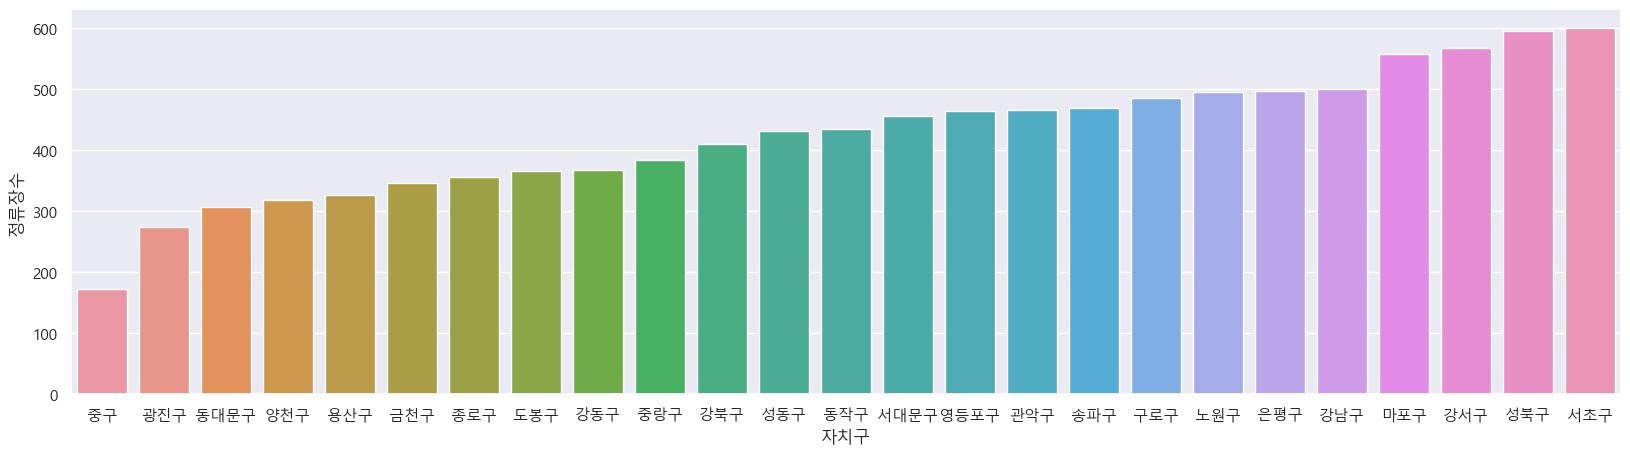

In [163]:
plt.figure(figsize=(20,5))
df_table = df_table.sort_values('정류장수')
sns.barplot(x='자치구', y='정류장수',data=df_table)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

plt.figure(figsize=(20,5))
df_table = df_table.sort_values('정류장수')
sns.barplot(x='자치구', y='정류장수',data=df_table)
plt.figure(figsize=(20,5))
df_table = df_table.sort_values('넓이')
sns.barplot(x='자치구', y='넓이',data=df_table)
plt.figure(figsize=(20,5))
df_table = df_table.sort_values('평균 이동 시간(분)')
sns.barplot(x='자치구', y='평균 이동 시간(분)',data=df_table)

<Axes: xlabel='자치구', ylabel='넓이'>

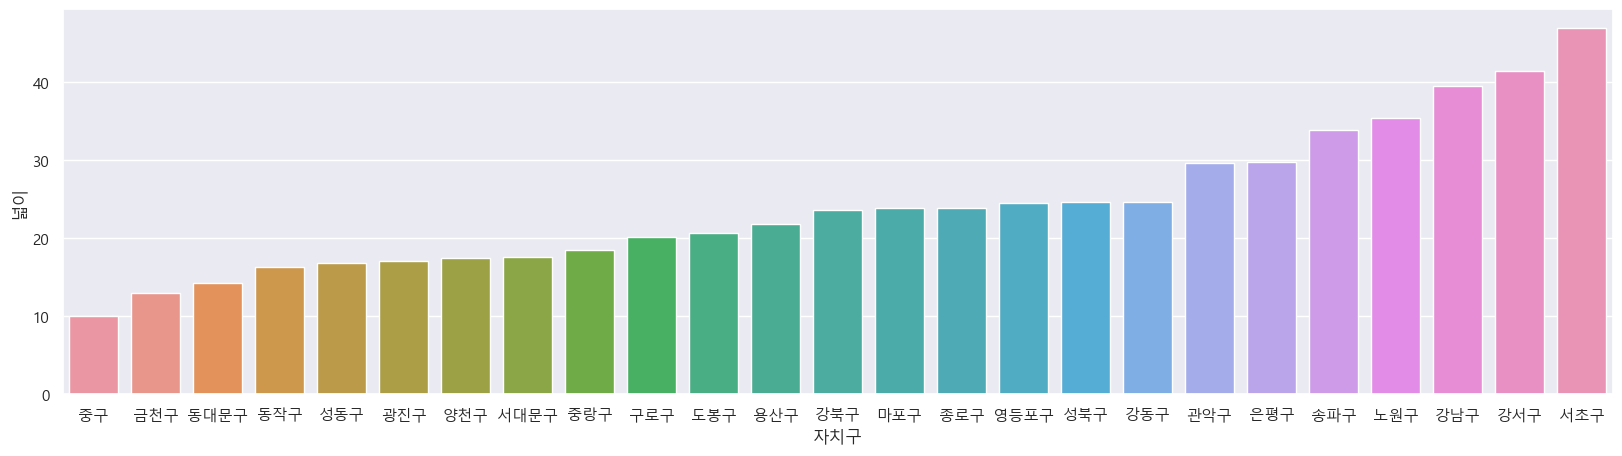

In [164]:
plt.figure(figsize=(20,5))
df_table = df_table.sort_values('넓이')
sns.barplot(x='자치구', y='넓이',data=df_table)

<Axes: xlabel='자치구', ylabel='평균 이동 시간(분)'>

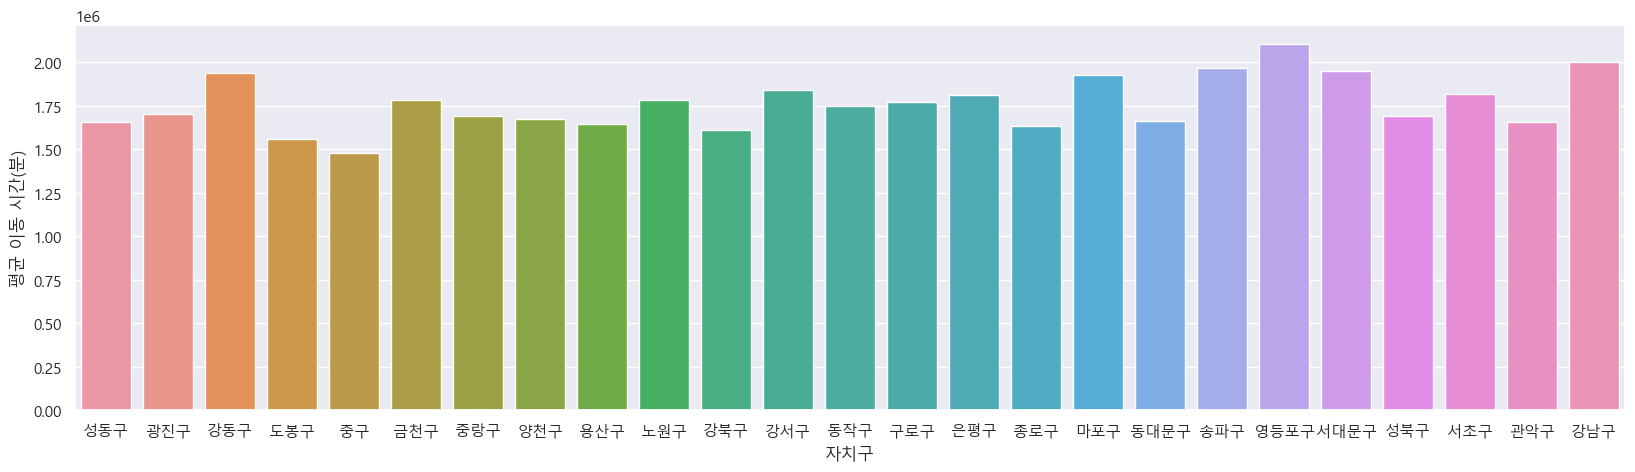

In [160]:
plt.figure(figsize=(20,5))
sns.barplot(x='자치구', y='평균 이동 시간(분)',data=df_table)

<Axes: xlabel='자치구', ylabel='이동인구(합)'>

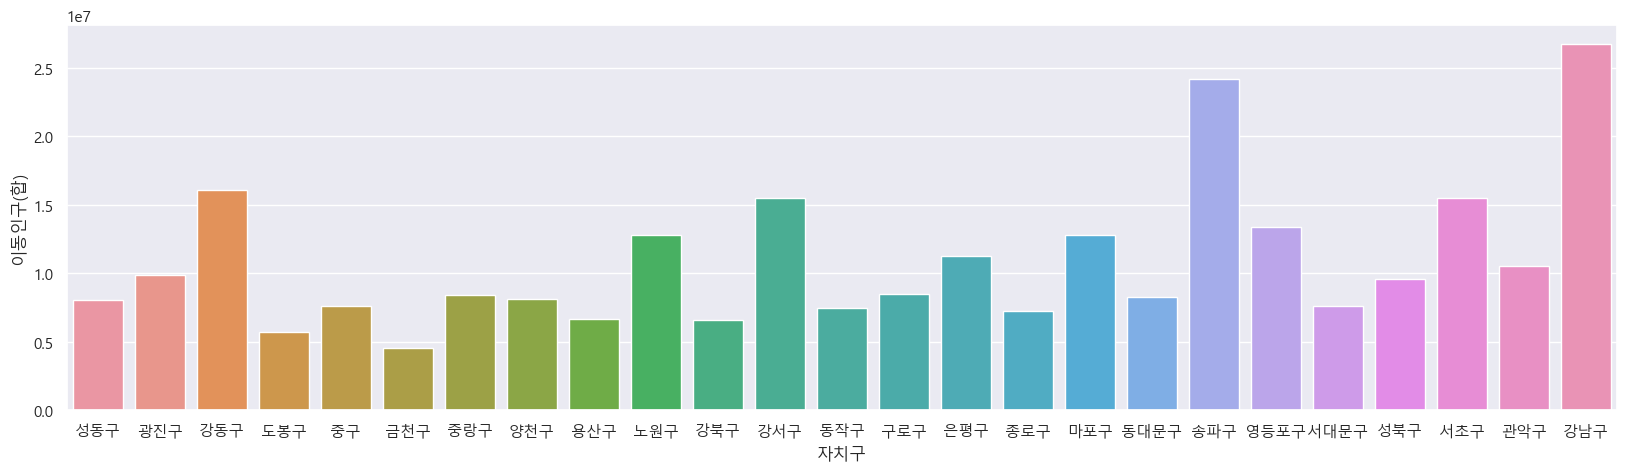

In [136]:
plt.figure(figsize=(20,5))
sns.barplot(x='자치구', y='이동인구(합)',data=df_table)

In [148]:
import scipy.stats as stats

In [157]:
df_table['정류장수/넓이']  = df_table['정류장수'] df_table['넓이']

In [138]:
stats.pearsonr(df_table['넓이'],df_table['평균 이동 시간(분)']) #약한 관계

PearsonRResult(statistic=0.44954376317695366, pvalue=0.02416223756324472)

In [139]:
stats.pearsonr(df_table['이동인구(합)'],df_table['평균 이동 시간(분)']) # 중간 관계

stats.pearsonr(df_table['넓이'],df_table['정류장수']) #약한 관계
stats.pearsonr(df_table['넓이'],df_table['평균 이동 시간(분)']) #약한 관계
stats.pearsonr(df_table['정류장수'],df_table['평균 이동 시간(분)'])
stats.pearsonr(df_table['노선수'],df_table['평균 이동 시간(분)'])

PearsonRResult(statistic=0.6761330176254268, pvalue=0.00020717655779289523)

In [140]:
stats.pearsonr(df_table['정류장수'],df_table['평균 이동 시간(분)'])

PearsonRResult(statistic=0.5370492679329871, pvalue=0.005637166048056491)

In [141]:
stats.pearsonr(df_table['노선수'],df_table['평균 이동 시간(분)'])

PearsonRResult(statistic=0.12117796893125946, pvalue=0.5639369832521209)

In [145]:
stats.pearsonr(df_table['정류장수/노선수'],df_table['평균 이동 시간(분)'])

PearsonRResult(statistic=0.30808249667309034, pvalue=0.13406360510869747)

In [158]:
stats.pearsonr(df_table['정류장수/넓이'],df_table['평균 이동 시간(분)'])

PearsonRResult(statistic=0.5302623808423287, pvalue=0.006398329691161304)

In [146]:
stats.pearsonr(df_table['이동인구(합)'],df_table['정류장수']) # 중간 관계

PearsonRResult(statistic=0.45185441537719395, pvalue=0.023356117667204575)

In [147]:
stats.pearsonr(df_table['노선수'],df_table['정류장수'])

PearsonRResult(statistic=0.2768098465421741, pvalue=0.18039444958282805)

#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [124]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 새벽 5시까지 도착하는 이동 사례, seoul_moving_night 변수 저장

seoul_moving_night = seoul_moving.loc[seoul_moving['도착시간']<5]
seoul_moving_night
seoul_moving_night.groupby('요일')['이동인구(합)'].sum()

요일
금    3463565.57
목    3366059.94
수    3988874.25
월    4137915.91
일    3744093.20
토    4465061.32
화    3646198.27
Name: 이동인구(합), dtype: float64

#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다.
* 시군구 코드:광역시도(2자리)+시군구(3자리) / 서울:11, 부산:26, 대구:27, 인천:28, 광주:29, 대전:30, 울산:31)

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [125]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 출발 시군구 코드, 도착 시군구 코드 <20000
seoul_moving_night = seoul_moving_night.loc[(seoul_moving_night['출발 시군구 코드']<20000)&(seoul_moving_night['도착 시군구 코드']<20000)]

In [126]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_moving_night

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90
...,...,...,...,...,...,...,...,...,...,...
2366290,202401,토,4,11250,11250,M,80,HH,7,9.52
2366291,202401,토,4,11250,11250,M,80,HW,36,18.89
2366292,202401,토,4,11250,11250,M,80,WE,17,47.60
2366293,202401,토,4,11250,11250,M,80,WH,192,18.89


#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [127]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 유출이 제일 많은 구와 적은 구는?
#제일 적은 = 금천구
#제일 많은 = 강남구
seoul_moving_night.groupby('출발 시군구 코드')[['이동인구(합)']].sum().sort_values(by='이동인구(합)')

,이동인구(합)
출발 시군구 코드,
11180,312428.85
11100,334307.08
11090,507413.60
11150,527304.60
11170,540034.98
11070,543592.86
11130,601695.00
11120,605892.38
11200,613033.58


In [128]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 유입이 제일 많은 구와 적은 구는?
#유입 적은 = 금천구
#유입 많은 = 강남구
seoul_moving_night.groupby('도착 시군구 코드')[['이동인구(합)']].sum().sort_values(by='이동인구(합)')

,이동인구(합)
도착 시군구 코드,
11180,353493.78
11100,455386.42
11010,455777.96
11020,559814.32
11090,569015.59
11030,575865.55
11170,601095.25
11150,623573.07
11070,671914.83


#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [137]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# '도착시간' >=5
seoul_moving_day = seoul_moving.loc[seoul_moving['도착시간']>=5]
seoul_moving_day = seoul_moving_day.loc[(seoul_moving_day['출발 시군구 코드']<20000)&(seoul_moving_day['도착 시군구 코드']<20000)]

[실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [138]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 평균을 구해서 df_mean 변수로 저장
df_mean = seoul_moving_day.groupby('도착 시군구 코드',as_index=False)[['평균 이동 시간(분)','이동인구(합)']].mean()
df_mean

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,59.819645,44.694476
1,11020,58.197800,47.183639
2,11030,57.995736,36.418986
3,11040,58.184820,41.879404
4,11050,60.890991,45.669953
5,11060,59.944131,40.631885
6,11070,63.727215,41.653042
7,11080,59.871429,44.970384
8,11090,65.100321,39.190099
9,11100,66.744401,38.268616


In [139]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 합을 구해서 df_sum 변수로 저장
# 평균이동시간(분) -> 총 이동 시간, 이동인구(합) -> 총 이동인구로 이름 대체
df_sum = seoul_moving_day.groupby('도착 시군구 코드',as_index=False)[['평균 이동 시간(분)','이동인구(합)']].sum()



In [140]:
df_sum.rename(columns={'평균 이동 시간(분)':'총 이동 시간','이동인구(합)':'총 이동인구'},inplace=True)
df_sum

,도착 시군구 코드,총 이동 시간,총 이동인구
0,11010,26504649,19803049.50
1,11020,26065980,21132891.17
2,11030,23776976,14930983.13
3,11040,24144722,17378528.65
4,11050,23556776,17668243.56
5,11060,24882389,16866011.11
6,11070,21685479,14173946.94
7,11080,24434129,18352863.32
8,11090,20733085,12481223.62
9,11100,19132149,10969622.19


In [165]:
# 파일을 합쳐볼까요
# pd.merge()

# df_mean
# df_sum

seoul_day_mov_sum_mean = pd.merge(df_mean,df_sum,how='inner',on='도착 시군구 코드')
seoul_day_mov_sum_mean


,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,59.819645,44.694476,26504649,19803049.50
1,11020,58.197800,47.183639,26065980,21132891.17
2,11030,57.995736,36.418986,23776976,14930983.13
3,11040,58.184820,41.879404,24144722,17378528.65
4,11050,60.890991,45.669953,23556776,17668243.56
5,11060,59.944131,40.631885,24882389,16866011.11
6,11070,63.727215,41.653042,21685479,14173946.94
7,11080,59.871429,44.970384,24434129,18352863.32
8,11090,65.100321,39.190099,20733085,12481223.62
9,11100,66.744401,38.268616,19132149,10969622.19


In [166]:
# 해당 데이터프레임을 csv 파일로 저장하세요
# to_csv()
seoul_day_mov_sum_mean.to_csv('seoul_day_mov_sum_mean.csv')

In [167]:

seoul_day_mov_sum_mean['도착 시군구 코드'] = seoul_day_mov_sum_mean['도착 시군구 코드'].astype(str)
seoul_day_mov_sum_mean['도착 시군구 코드'] = seoul_day_mov_sum_mean['도착 시군구 코드'].map(lambda x : x[2:4])
seoul_day_mov_sum_mean.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,01,59.819645,44.694476,26504649,19803049.50
1,02,58.197800,47.183639,26065980,21132891.17
2,03,57.995736,36.418986,23776976,14930983.13
3,04,58.184820,41.879404,24144722,17378528.65
4,05,60.890991,45.669953,23556776,17668243.56


In [168]:
seoul_day_mov_sum_mean['도착 시군구 코드'] = seoul_day_mov_sum_mean['도착 시군구 코드'].map({
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})

In [169]:
seoul_day_mov_sum_mean.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,종로구,59.819645,44.694476,26504649,19803049.50
1,중구,58.197800,47.183639,26065980,21132891.17
2,용산구,57.995736,36.418986,23776976,14930983.13
3,성동구,58.184820,41.879404,24144722,17378528.65
4,광진구,60.890991,45.669953,23556776,17668243.56


---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [22]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

<Axes: xlabel='도착 시군구 코드', ylabel='총 이동인구'>

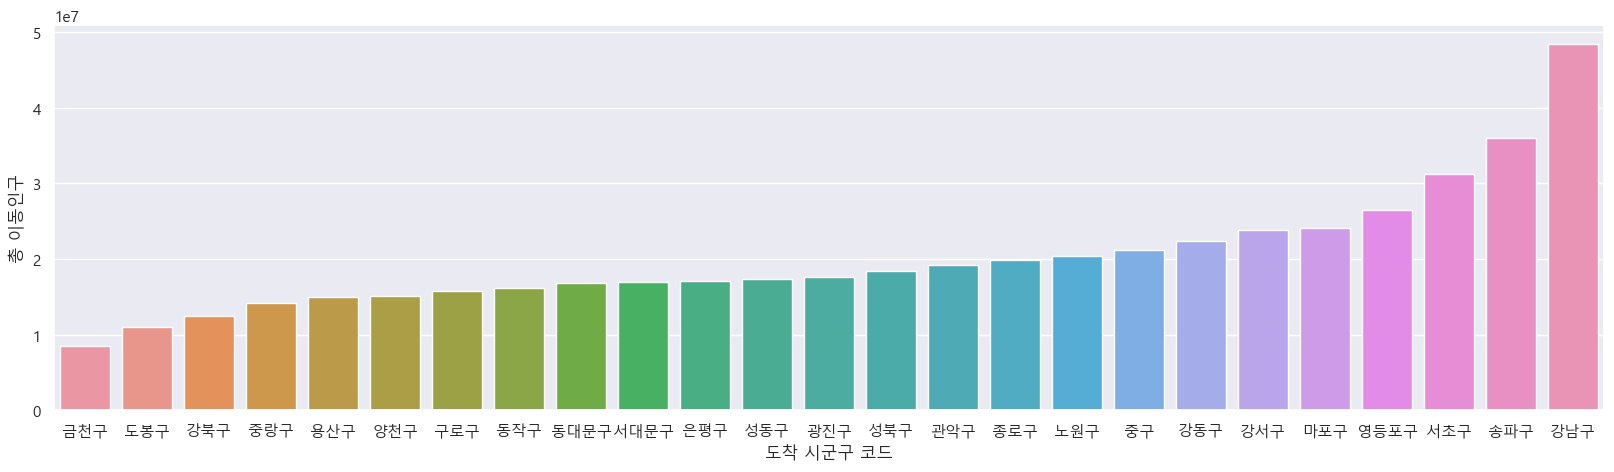

In [179]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,5))
seoul_day_mov_sum_mean.sort_values('총 이동인구',inplace=True)
sns.barplot(x='도착 시군구 코드', y='총 이동인구', data=seoul_day_mov_sum_mean)

<Axes: xlabel='도착 시군구 코드', ylabel='총 이동 시간'>

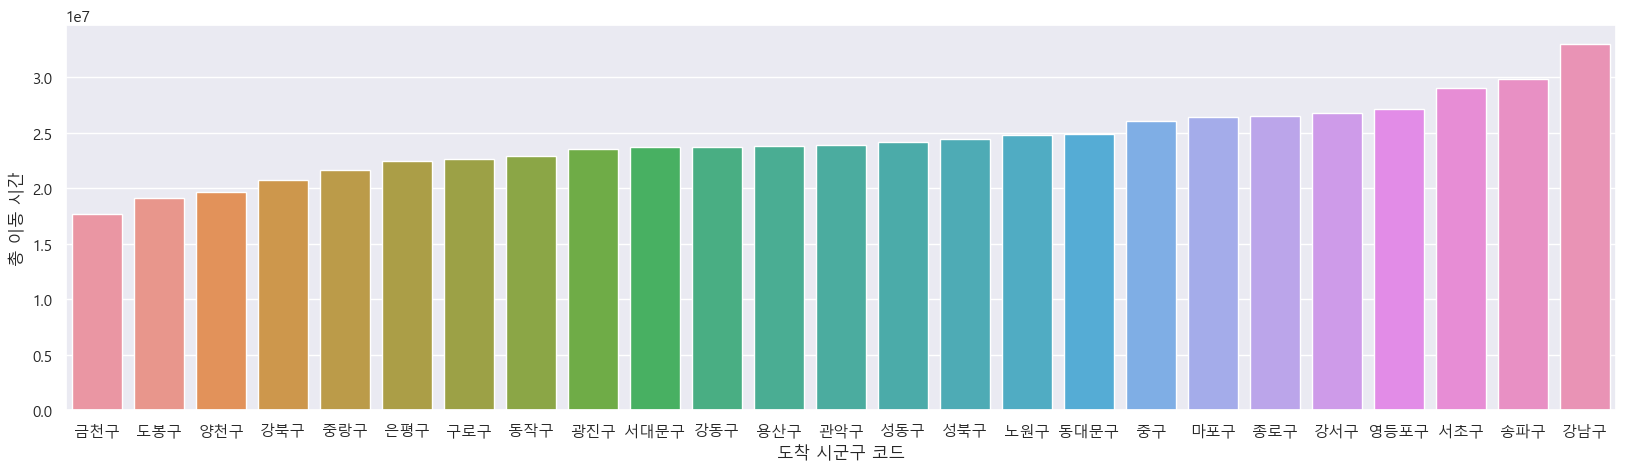

In [180]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,5))
seoul_day_mov_sum_mean.sort_values('총 이동 시간',inplace=True)
sns.barplot(x='도착 시군구 코드', y='총 이동 시간', data=seoul_day_mov_sum_mean)

<Axes: xlabel='도착 시군구 코드', ylabel='평균 이동 시간(분)'>

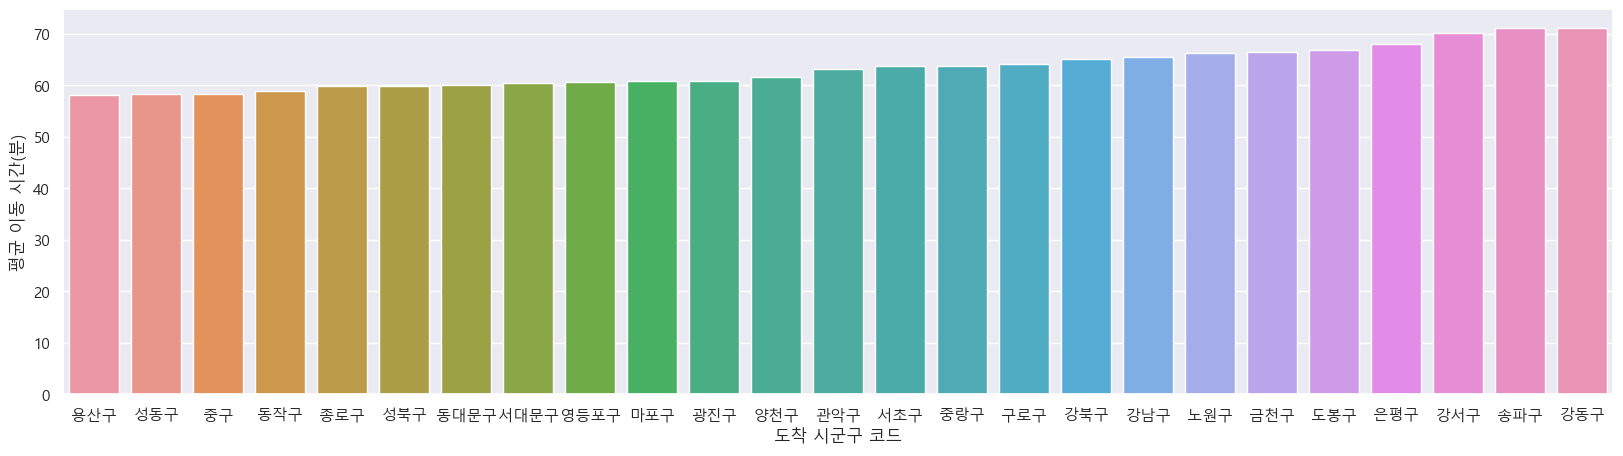

In [181]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,5))
seoul_day_mov_sum_mean.sort_values('평균 이동 시간(분)',inplace=True)
sns.barplot(x='도착 시군구 코드', y='평균 이동 시간(분)', data=seoul_day_mov_sum_mean)

In [174]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 강남구의 유입이 제일 많다.
# 2. 
# 3.

---